# Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("portfolio_data.csv", header = [0,1], index_col = 0, parse_dates =[0])

# Portfolio Close Prices

In [3]:
df.Close
close = df.Close.copy()
close

Ticker,CW8.MI,ETHE,GC=F,IDTP.L,LYTNOW.SW,SXRC.MU
Date,,,,,,
2020-01-06,312.010010,2.933333,1566.199951,220.850006,354.850006,5.6300
2020-01-07,314.329987,3.194444,1571.800049,221.100006,356.500000,5.4100
2020-01-08,315.170013,3.046667,1557.400024,220.600006,357.000000,5.4400
2020-01-09,317.339996,2.977778,1551.699951,220.149994,363.200012,5.4400
2020-01-10,317.230011,2.888889,1557.500000,221.000000,365.100006,5.4400
...,...,...,...,...,...,...
2024-12-27,571.869995,27.959999,2617.199951,238.210007,924.299988,4.2460
2024-12-30,569.080017,28.450001,2606.100098,238.929993,921.000000,4.3060
2024-12-31,569.080017,28.020000,2629.199951,239.440002,921.000000,4.3060


# Assets Expected Return and Variance

In [4]:
# Get the list of assets (assuming they are the top-level columns of the 'Close' DataFrame)
assets = close.columns.get_level_values(0).unique()

In [5]:
results = {}

# Calculate returns for ALL assets FIRST 
returns_all_assets = close.pct_change().dropna()  


for asset in assets:
    asset_data = close[asset].dropna().to_frame().copy()
    asset_data.rename(columns={asset: "Price"}, inplace=True)

     # Calculate returns
    asset_data["returns"] = asset_data["Price"].pct_change() 

     # Annualize (252 trading days)
    expected_return = np.mean(asset_data["returns"]) 
    expected_return = expected_return*252
    variance = np.var(asset_data["returns"])
    st_deviation =  np.sqrt(variance*252)

    # Print the value
    print(f"The Expected Return for {asset} is {expected_return:.2%} per year.")
    print(f"The St Deviation for {asset} is {st_deviation:.2%} per year.") 

     # Store both return and variance in a dictionary
    results[asset] = { 
        "Expected Return": expected_return,
        "St. Deviation": st_deviation
    }

The Expected Return for CW8.MI is 13.32% per year.
The St Deviation for CW8.MI is 16.66% per year.
The Expected Return for ETHE is 103.01% per year.
The St Deviation for ETHE is 107.45% per year.
The Expected Return for GC=F is 11.51% per year.
The St Deviation for GC=F is 16.03% per year.
The Expected Return for IDTP.L is 1.81% per year.
The St Deviation for IDTP.L is 7.76% per year.
The Expected Return for LYTNOW.SW is 21.80% per year.
The St Deviation for LYTNOW.SW is 25.42% per year.
The Expected Return for SXRC.MU is 2.37% per year.
The St Deviation for SXRC.MU is 39.02% per year.


In [6]:
# DataFrame to summarize the results:
results_df = pd.DataFrame.from_dict(results, orient='index')

print("\nSummary of Expected Annual Returns and St. Deviations:")
print(results_df)


Summary of Expected Annual Returns and St. Deviations:
           Expected Return  St. Deviation
CW8.MI            0.133201       0.166646
ETHE              1.030072       1.074457
GC=F              0.115089       0.160264
IDTP.L            0.018112       0.077618
LYTNOW.SW         0.217980       0.254180
SXRC.MU           0.023706       0.390229


In [7]:
results_df.to_csv("portfolio_return.csv")

C:\Users\marke\AppData\Local\Temp\ipykernel_10496\2684805843.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(asset, (results_df['St. Deviation'][i], results_df['Expected Return'][i]), textcoords="offset points", xytext=(0,10), ha='center')


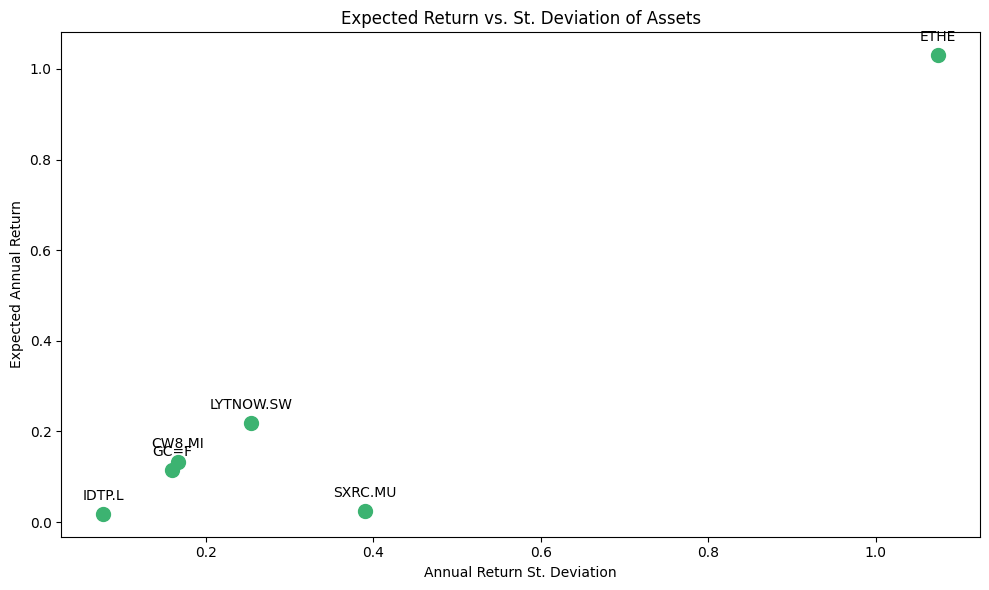

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['St. Deviation'], results_df['Expected Return'], color='mediumseagreen', s=100)  # Adjust marker size (s)
plt.xlabel('Annual Return St. Deviation')
plt.ylabel('Expected Annual Return')
plt.title('Expected Return vs. St. Deviation of Assets')

# Add annotations for each point (optional):
for i, asset in enumerate(results_df.index):
    plt.annotate(asset, (results_df['St. Deviation'][i], results_df['Expected Return'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Covariance

In [9]:
covariance_matrix = returns_all_assets.cov() * 252  # Annualize the covariance matrix
covariance_matrix 

Ticker,CW8.MI,ETHE,GC=F,IDTP.L,LYTNOW.SW,SXRC.MU
Ticker,,,,,,
CW8.MI,0.027792,0.042735,0.001464,0.002152,0.028558,-0.002456
ETHE,0.042735,1.155353,0.022826,0.010937,0.049319,-0.015792
GC=F,0.001464,0.022826,0.025704,0.004852,0.005854,0.002139
IDTP.L,0.002152,0.010937,0.004852,0.006029,0.003386,0.004709
LYTNOW.SW,0.028558,0.049319,0.005854,0.003386,0.064658,-0.005040
SXRC.MU,-0.002456,-0.015792,0.002139,0.004709,-0.005040,0.152397


In [10]:
covariance_matrix.to_csv("portfolio_covariance.csv")

# Portfolio Annual Return & Variance

In [11]:
# 4.3% annual risk-free rate
risk_free_rate = 0.043 

In [12]:
# Set your desired weights:
weights = np.array([0.15, 0.2, 0.15, 0.1, 0.3, 0.1])

In [13]:
# Make sure the number of weights matches the number of assets
if len(weights) != len(assets):
    raise ValueError("Number of weights must match the number of assets.")

In [14]:
# Normalize the weights (just in case they don't sum to exactly 1 due to rounding):
weights = weights / np.sum(weights)

In [15]:
portfolio_return = np.sum(weights * results_df['Expected Return'])

In [16]:
#Calculating portfolio variance with set weights:
portfolio_variance = weights.T @ covariance_matrix @ weights
portfolio_std_dev = np.sqrt(portfolio_variance)

# Sharp Ratio

In [17]:
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

# BETA

In [18]:
beta= (portfolio_return - risk_free_rate) / (0.13 -  risk_free_rate)

# Result

In [19]:
print(f"Portfolio Annual Return (using set weights): {portfolio_return:.2%}")
print(f"Portfolio Variance: {portfolio_variance:.2%}")
print(f"Portfolio Standard Deviation: {portfolio_std_dev:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"BETA: {beta:.2f}")

Portfolio Annual Return (using set weights): 31.28%
Portfolio Variance: 6.78%
Portfolio Standard Deviation: 26.05%
Sharpe Ratio: 1.04
BETA: 3.10
